In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from GPyOpt.methods import BayesianOptimization
import GPy
import GPyOpt
from numpy.random import seed
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


In [22]:
def myf(x):
    return -((x>0)*2-1)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-100,100)}]
max_iter = 5

In [4]:
myProblem = BayesianOptimization(myf,bounds,acquisition_type="BinaryT")

NameError: name 'myf' is not defined

  0%|          | 0/5 [00:00<?, ?it/s]

[[ 90.17257321]
 [-76.17486007]
 [-50.99557808]
 [-75.57736801]
 [ 15.14741273]
 [-20.88059403]]


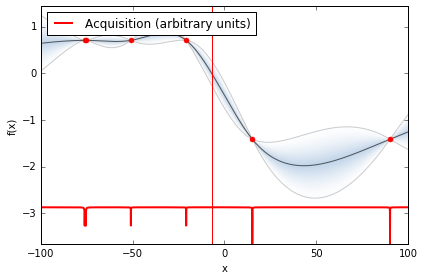

 20%|██        | 1/5 [00:01<00:07,  1.83s/it]

[[ 90.17257321]
 [-76.17486007]
 [-50.99557808]
 [-75.57736801]
 [ 15.14741273]
 [-20.88059403]
 [ -6.93890642]]


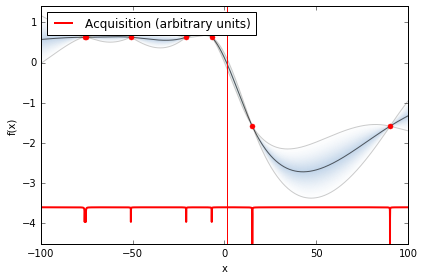

 40%|████      | 2/5 [00:03<00:05,  1.83s/it]

[[ 90.17257321]
 [-76.17486007]
 [-50.99557808]
 [-75.57736801]
 [ 15.14741273]
 [-20.88059403]
 [ -6.93890642]
 [  1.16162321]]


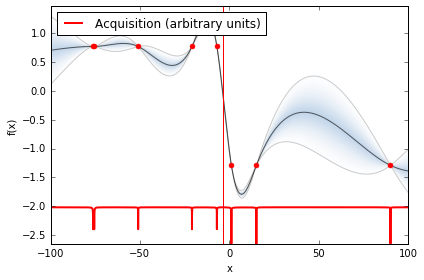

 60%|██████    | 3/5 [00:05<00:03,  1.89s/it]

[[ 90.17257321]
 [-76.17486007]
 [-50.99557808]
 [-75.57736801]
 [ 15.14741273]
 [-20.88059403]
 [ -6.93890642]
 [  1.16162321]
 [ -3.77493677]]


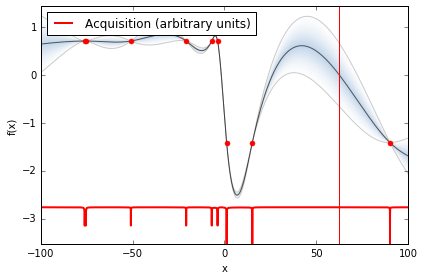

 80%|████████  | 4/5 [00:07<00:01,  1.93s/it]

[[ 90.17257321]
 [-76.17486007]
 [-50.99557808]
 [-75.57736801]
 [ 15.14741273]
 [-20.88059403]
 [ -6.93890642]
 [  1.16162321]
 [ -3.77493677]
 [ 62.53171194]]


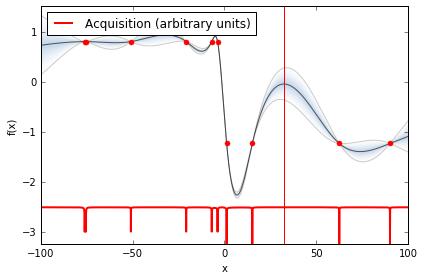

100%|██████████| 5/5 [00:09<00:00,  1.97s/it]


In [24]:
from IPython.display import clear_output

for i in tqdm(range(max_iter)):
    myProblem.run_optimization(max_iter=1) 
    myProblem.plot_acquisition()

In [2]:
myProblem.plot_convergence()

NameError: name 'myProblem' is not defined